#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [ ]:
from google.colab import files
# uploaded = files.upload()
!ls

Saving ex1data2.txt to ex1data2.txt
ex1data2.txt  sample_data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y


print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i,0].item():.0f}')


(47, 2)
(47, 1)
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


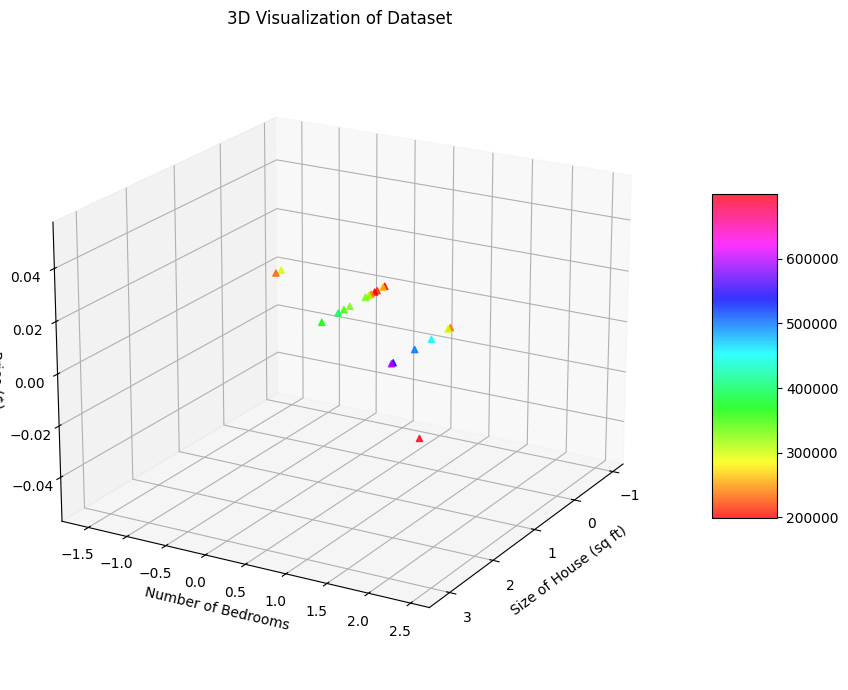

In [ ]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [ ]:

data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]

# Normalización de datos
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)

# Resultados
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the dataset:')
for i in range(10):
    print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')
print(X.shape)


mu= [2000.68085106    3.17021277], std = [7.86202619e+02 7.52842809e-01]
First 10 examples from the dataset:
x = [0.1314 -0.2261]
x = [-0.5096 -0.2261]
x = [0.5079 -0.2261]
x = [-0.7437 -1.5544]
x = [1.2711 1.1022]
x = [-0.0199 1.1022]
x = [-0.5936 -0.2261]
x = [-0.7297 -0.2261]
x = [-0.7895 -0.2261]
x = [-0.6445 -0.2261]
(47, 2)


# Cost Function

The objective of linear regression is to minimize the cost function:
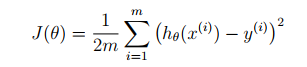

where the hypothesis h is given by

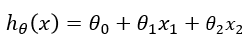




In [ ]:
# using numpy and scipy
# Sigmoid function
import numpy as np
from scipy.optimize import minimize

# Cargar datos
data = np.loadtxt('ex1data2.txt', delimiter=',')
m = data.shape[0]

X = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)

# Normalizar características
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)

X = np.hstack([np.ones((m, 1)), X])  # Ahora X es (m x 3)

# Funciónal de costo
def cost_function(theta, X, y):
    J = 0
    return J

theta = np.zeros((3, 1))

# Imprimir resultados
print(X[0:5, :])
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")



[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
Model parameters: [[0.]
 [0.]
 [0.]]
Cost function: 0


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

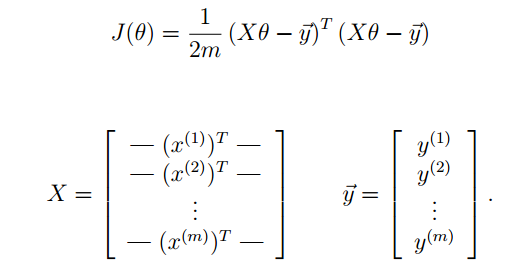

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

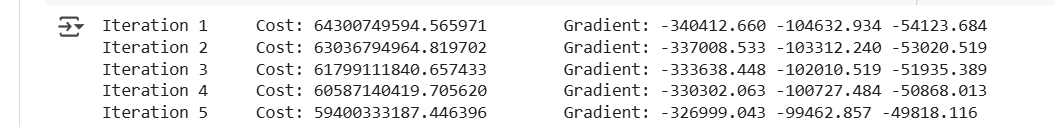

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors**2)
    return J

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)

    for iter in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        grad_J = (1/m) * (X.T @ errors)
        theta = theta - alpha * grad_J
        J_history[iter] = cost_function(theta, X, y)

        print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {grad_J[0, 0]:.3f} {grad_J[1, 0]:.3f} {grad_J[2, 0]:.3f}")

    return theta, J_history

X = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)
m = len(y)

X, mu, sigma = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])
theta = np.zeros((3, 1))

alpha = 0.01
iterations = 3
theta, _ = gradientDescent(X, y, theta, alpha, iterations)

print("\nTheta found by gradient descent:", theta.ravel())

input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma
predict1 = np.hstack([1, normalized_features]) @ theta
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a price of ${predict1.item():.2f}')


Iteration 1	Cost: 64297776251.620102	Gradient: -340412.660 -105764.133 -54708.822
Iteration 2	Cost: 63031018305.521317	Gradient: -337008.533 -104400.141 -53569.489
Iteration 3	Cost: 61790694237.532494	Gradient: -333638.448 -103056.168 -52449.188

Theta found by gradient descent: [10110.59640202  3132.20441912  1607.2749847 ]
For a house with 2000 sqft and 3 bedrooms, we predict a price of $9744.49


# Visualization

#Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
the number of the iterations.

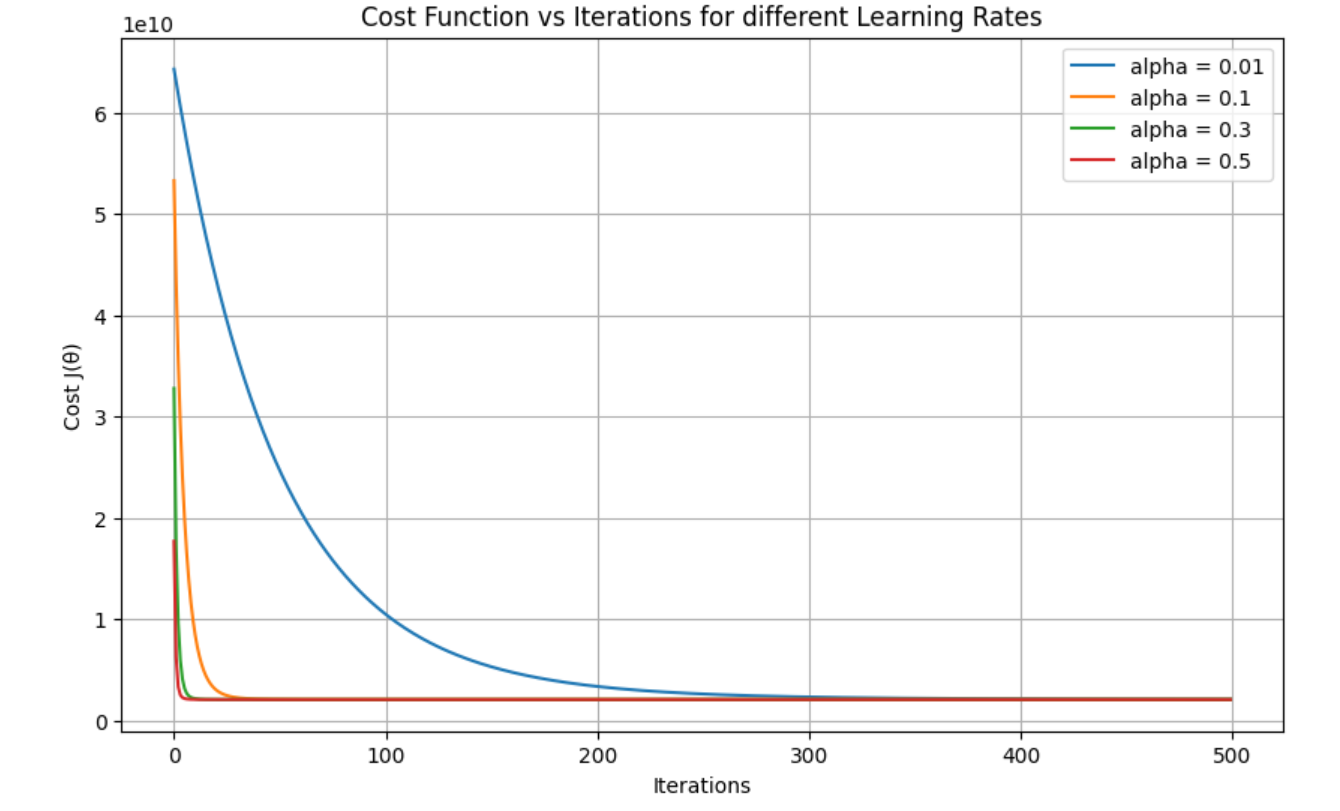

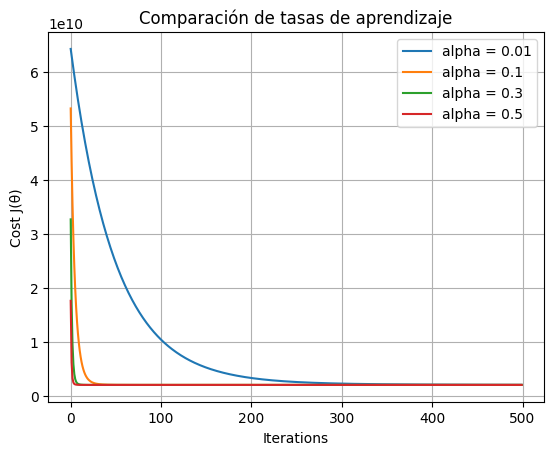

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors**2)
    return J

def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)

    for iter in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        grad_J = (1/m) * (X.T @ errors)
        theta = theta - alpha * grad_J
        J_history[iter] = cost_function(theta, X, y)

    return theta, J_history

X = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)
m = len(y)

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])

iterations = 500
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])
matrix_J = np.zeros((iterations, len(alpha_vector)))

for i in range(len(alpha_vector)):
    theta = np.zeros((3, 1))
    alpha = alpha_vector[i]
    theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
    matrix_J[:, i] = J_history

for i in range(len(alpha_vector)):
    plt.plot(range(iterations), matrix_J[:, i], label=f'alpha = {alpha_vector[i]}')

plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.title('Comparación de tasas de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()
